## Практическое задание №6

In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy import linalg

warnings.filterwarnings('ignore')

### 1. Решите линейную систему

In [2]:
A = np.array([
    [1, 2, 3],
    [4, 0, 6],
    [7, 8, 9]
])

B = np.array([12, 2, 1])

Способ 1

In [3]:
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

Способ 2

In [4]:
Ainv = np.linalg.inv(A)

np.dot(Ainv, B)

array([-9.2       ,  0.9       ,  6.46666667])

### 2. Найдите псевдорешение

In [5]:
A = np.array([
    [1, 2, -1],
    [3, -4, 0],
    [8, -5, 2],
    [2, 0, -5],
    [11, 4, -7]
])

B = np.array([1, 7, 12, 7, 15])

In [6]:
answers = np.linalg.lstsq(A, B)[0]

print(answers)

[ 1.13919353 -0.90498444 -0.9009803 ]


In [7]:
np.abs(np.dot(A, answers) - B)

array([0.76979505, 0.03751834, 0.16349019, 0.21671145, 0.21805313])

### 3. Сколько решений имеет линейная система

In [8]:
def number_of_decisions(A, B):
    C = np.concatenate((A, B.T), axis=1)
    
    rank_A = np.linalg.matrix_rank(A, 0.0001)
    rank_C = np.linalg.matrix_rank(C, 0.0001)
    
    is_a_singular = A.shape[0] != A.shape[1] or rank_A != A.shape[0]
    
    print(C)
    print(f'{rank_A}\n{rank_C}')
    
    if rank_A < rank_C:
        return 'Система не имеет решений'
    elif rank_A == rank_C and is_a_singular:
        return 'Система имеет бесконечное количество решений'
    else:
        return 'Система имеет единственное решение'

In [9]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

B = np.array([[12, 2, 1]])

print(number_of_decisions(A, B))

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]
2
3
Система не имеет решений


In [10]:
B = np.array([[2, 2, 2]])

print(number_of_decisions(A, B))

[[1 2 3 2]
 [4 5 6 2]
 [7 8 9 2]]
2
2
Система имеет бесконечное количество решений


### 4. Вычислите LU-разложение матрицы

In [11]:
A = np.array([
    [1, 2, 3],
    [2, 16, 21],
    [4, 28, 73]
])

P, L, U = linalg.lu(A)

print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [12]:
B = np.array([6, 42, 8])

A2 = np.dot(L, U)

np.linalg.solve(A2, B)

array([55.15740741, -5.10648148, -0.98148148])

### 5. Найдите нормальное псевдорешение недоопределенной системы

In [13]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

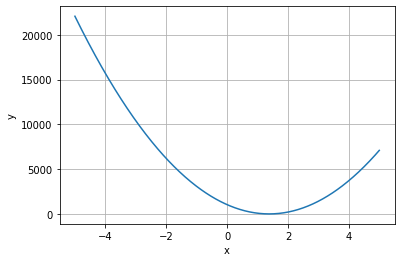

In [14]:
# 2z = 2x + 4y - 2
# 2z = 12 - 8x + 5y

# 2x + 4y - 2 = 12 - 8x + 5y
# y = 10x - 14

# z = x + 2y - 1
# z = x + 2(10x - 14) - 1
# z = 21x - 29
 
x = np.linspace(-5, 5, 501)
q = []



plt.plot(x, Q(x, 10 * x - 14, 21 * x - 29))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [15]:
# 2z = 2x + 4y - 2
# 2z = 12 - 8x + 5y

# 2x + 4y - 2 = 12 - 8x + 5y
# y = 10x - 14

# z = x + 2y - 1
# z = x + 2(10x - 14) - 1
# z = 21x - 29
 
x = np.linspace(-5, 5, 1001)
q = []

q_min = 1e308
x_min, y_min, z_min = 0, 0, 0

for x_ in x:
    y_ = 10 * x_ - 14
    z_ = 21 * x_ - 29
    q_ = Q(x_, y_, z_)
    q.append(q_)
    if q_min > q_:
        q_min = q_
        x_min, y_min, z_min = x_, y_, z_
        
print(f'x = {x_min}\ny = {y_min}\nz = {z_min}')

x = 1.38
y = -0.20000000000000107
z = -0.020000000000003126


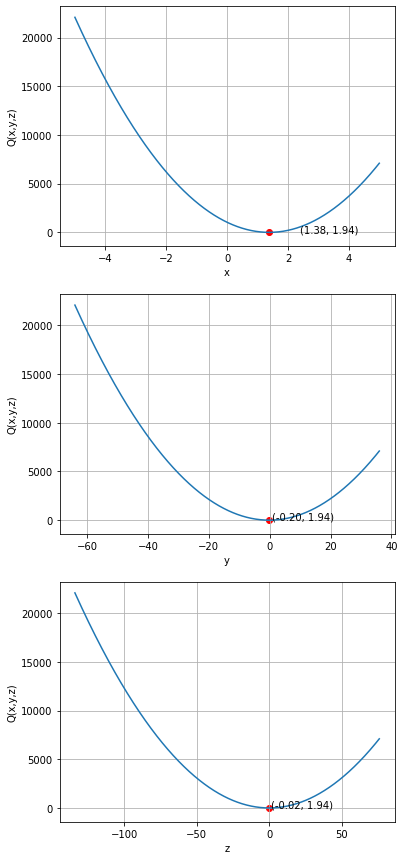

In [16]:
plt.rcParams['axes.grid'] = True
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(6,15))

ax1.set(xlabel='x', ylabel='Q(x,y,z)')
ax1.plot(x, q)
ax1.scatter(x_min, q_min, c='r')
ax1.annotate(f'({x_min:.2f}, {q_min:.2f})', xy=(x_min + 1, q_min))

ax2.set(xlabel='y', ylabel='Q(x,y,z)')
ax2.plot(10 * x - 14, q)
ax2.scatter(y_min, q_min, c='r')
ax2.annotate(f'({y_min:.2f}, {q_min:.2f})', xy=(y_min + 1, q_min))

ax3.set(xlabel='z', ylabel='Q(x,y,z)')
ax3.plot(21 * x - 29, q)
ax3.scatter(z_min, q_min, c='r')
ax3.annotate(f'({z_min:.2f}, {q_min:.2f})', xy=(z_min + 1, q_min));

In [17]:
np.linalg.lstsq([[1, 2, -1], [8, -5, 2]], [1, 12])

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

### 6. Найдите одно из псевдорешений вырожденной системы

In [18]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([2, 5, 11])

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([6, 12, 24])

Q, R = np.linalg.qr(A)

In [19]:
np.dot(Q, R)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [20]:
R1 = R[:2, :2]
B1 = np.dot(np.transpose(Q), B)[:2]

In [21]:
X1 = np.linalg.solve(R1, B1)
X1

array([1., 2.])